In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the training and validation paths of the respective CSVs
TRAINING_PATH = "/content/drive/MyDrive/1:1_Hanish_Acharla/Dataset/Featurization_Vani/train_augment.csv"
VALIDATION_PATH = "/content/drive/MyDrive/1:1_Hanish_Acharla/Dataset/Featurization_Vani/validation_augment.csv"

In [ ]:
import pandas as pd
training_data=pd.read_csv(TRAINING_PATH)
validation_data=pd.read_csv(VALIDATION_PATH)

In [ ]:
#label encoding for training data
labels = training_data['label'].unique()
labels.sort()
print(labels)
valid_labels = validation_data['label'].unique()
valid_labels.sort()
print(valid_labels)

['complex' 'frog_eye_leaf_spot' 'healthy' 'powdery_mildew' 'rust' 'scab']
['complex' 'frog_eye_leaf_spot' 'healthy' 'powdery_mildew' 'rust' 'scab']


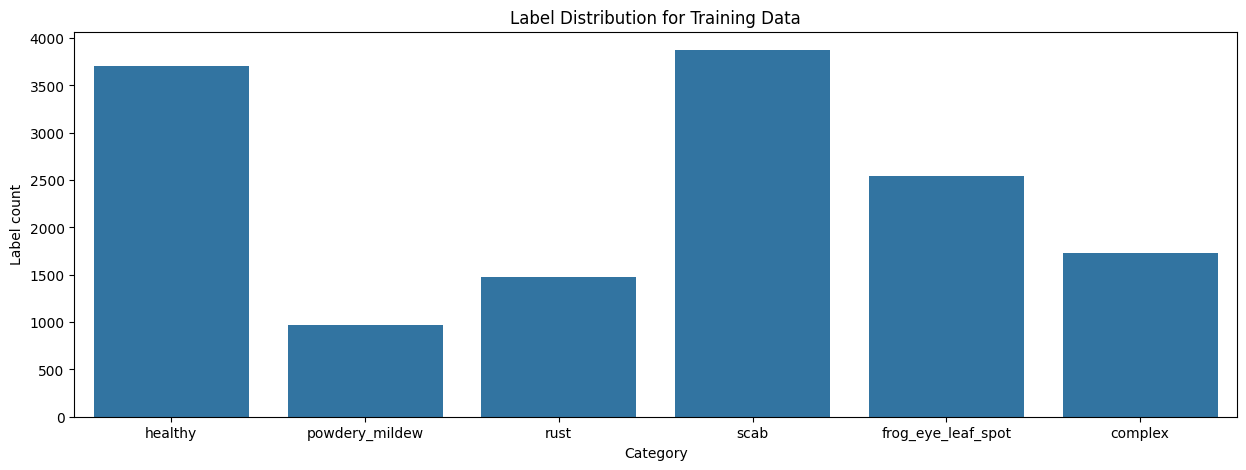

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# training data label distribution
plt.figure(figsize = (15,5))
sns.countplot(data = training_data, x = "label")
plt.title("Label Distribution for Training Data")
plt.xlabel("Category")
plt.ylabel("Label count")
plt.show();

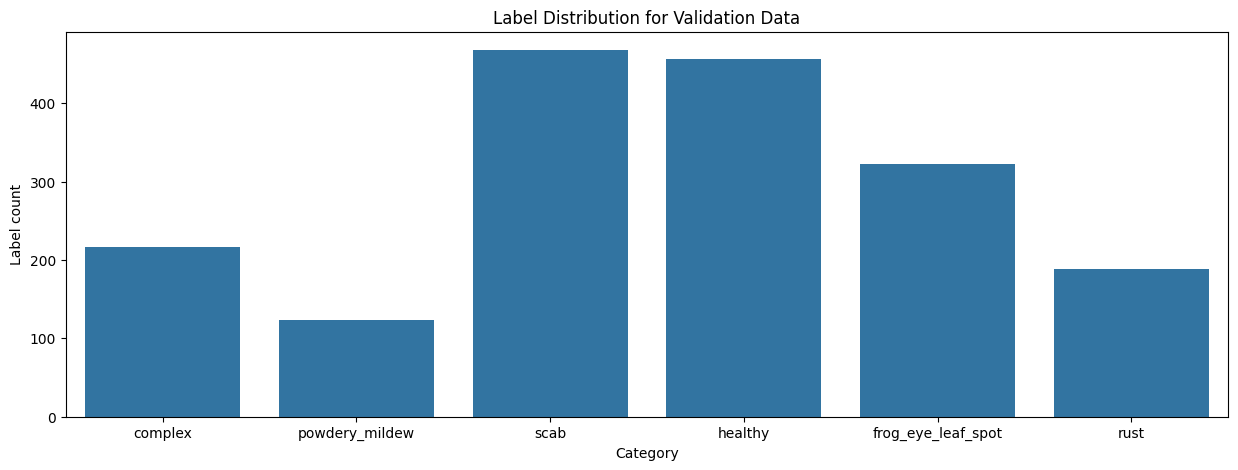

In [ ]:
# validation data label distribution
plt.figure(figsize = (15,5))
sns.countplot(data = validation_data, x = "label")
plt.title("Label Distribution for Validation Data")
plt.xlabel("Category")
plt.ylabel("Label count")
plt.show();

In [ ]:
#label encoding the training data
training_data['label'] = pd.factorize(training_data['label'], sort = True)[0]
training_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,-0.020046,0.019089,-0.064406,-0.145049,-0.156780,-0.199031,0.251732,-0.256354,0.167689,0.095007,...,-0.355522,0.128115,0.189741,0.177772,-0.155530,-0.347708,1.299238,0.370941,-0.345642,2
1,0.369390,-0.099055,-0.120948,0.500059,-0.349227,-0.074015,-0.005180,0.007338,-0.048866,0.144591,...,-0.347734,0.006622,0.412748,0.200993,-0.019583,-0.376797,-0.187524,1.122966,0.208827,3
2,0.229106,0.000782,-0.252797,0.818602,0.091315,-0.015447,-0.012223,-0.365150,0.044658,-0.179511,...,-0.705034,0.247021,0.070499,-0.063077,0.425216,-0.243749,1.922868,-0.137857,-0.104352,4
3,0.398739,0.158449,-0.116618,0.031977,0.446290,0.039429,0.084072,-0.837068,-0.397252,-0.064726,...,-0.080484,0.549686,0.364024,0.078743,-0.053948,-0.269641,1.146880,0.993538,-0.109244,4
4,0.550900,0.117974,-0.129737,0.723962,-0.275446,-0.026667,-0.080661,-0.231700,0.038180,0.164768,...,-0.282695,0.061890,-0.020826,-0.112487,-0.053951,-0.051489,1.209125,1.144145,-0.264024,5


In [ ]:
validation_data['label'] = pd.factorize(validation_data['label'], sort = True)[0]
validation_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,0.729124,0.148520,-0.394832,0.236617,0.253368,0.047914,-0.237792,-0.335544,0.259138,0.401287,...,-0.390792,0.416583,1.000027,0.381861,0.170806,-0.234610,-0.393356,0.656400,0.109541,0
1,0.401880,-0.057813,-0.210069,0.265692,0.161712,0.549494,0.096016,-0.135368,0.100047,0.065842,...,-0.449223,-0.266074,0.295139,0.432121,-0.044255,-0.214490,1.279616,0.069250,-0.031352,3
2,0.837973,0.029211,0.027390,0.447081,-0.081210,-0.058751,-0.034344,-0.638752,0.173755,-0.319819,...,-0.369934,0.072103,0.386759,0.067003,-0.103516,-0.424714,1.008472,0.921903,-0.280284,5
3,1.310340,0.111431,-0.117289,0.338195,-0.216326,-0.429484,0.238363,-0.440637,0.057221,-0.015807,...,-0.342086,-0.081225,0.427982,0.078306,0.152517,-0.386858,1.212164,0.950870,0.340183,2
4,0.864885,0.108001,-0.273892,0.082144,-0.152893,0.516105,0.188856,-0.229956,0.029949,0.183209,...,-0.501705,0.230081,0.533076,-0.185419,0.010482,-0.454136,0.881352,0.600939,-0.269412,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train = training_data.iloc[:, :-1].values
x_valid = validation_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values
y_valid = validation_data.iloc[:, -1].values
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(14307, 2048)
(1773, 2048)
(14307,)
(1773,)


In [ ]:
# result/confusion matrix function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_evaluations(y_true, y_pred):
  import matplotlib.pyplot as plt
  import seaborn as sns
  acc_score = accuracy_score(y_true, y_pred)
  print("Accuracy score: {}\n".format(acc_score))
  print("Classification Report: {}".format(classification_report(y_true, y_pred)))
  plt.figure(figsize = (10,10))
  sns.heatmap(confusion_matrix(y_true, y_pred),  annot = True, fmt="g", cmap = "Blues", xticklabels = labels, yticklabels = labels)
  plt.title("Consfuion Matrix")
  plt.show()

In [ ]:
#KNN HyperParam tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
K = [i for i in range(2,15)]#Number of Neigbors Hyperparam
accuracies = []
for k_value in K:
  main_model = KNeighborsClassifier(n_neighbors=k_value, n_jobs = -1)
  main_model.fit(x_train,y_train)
  y_pred = main_model.predict(x_valid)
  accuracies.append(accuracy_score(y_valid, y_pred))
  print("Neighbour {} experiment done".format(k_value))

Neighbour 2 experiment done
Neighbour 3 experiment done
Neighbour 4 experiment done
Neighbour 5 experiment done
Neighbour 6 experiment done
Neighbour 7 experiment done
Neighbour 8 experiment done
Neighbour 9 experiment done
Neighbour 10 experiment done
Neighbour 11 experiment done
Neighbour 12 experiment done
Neighbour 13 experiment done
Neighbour 14 experiment done


In [ ]:
print(accuracies)

[0.7157360406091371, 0.7591652566271856, 0.7687535250987028, 0.7732656514382402, 0.7743936830231246, 0.7834179357021996, 0.784545967287084, 0.7901861252115059, 0.7935702199661591, 0.7907501410039481, 0.7901861252115059, 0.7941342357586012, 0.7907501410039481]


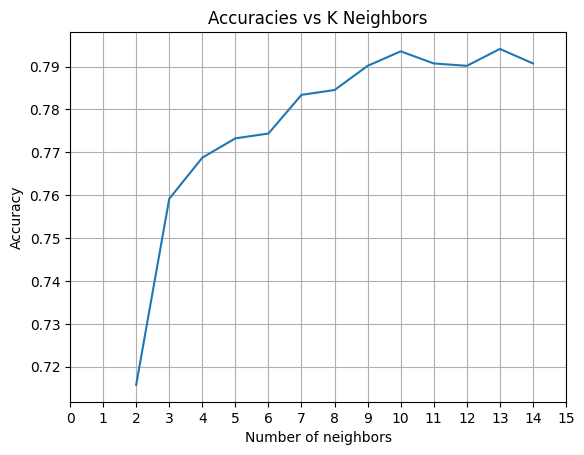

In [ ]:
#KNN Training Accuracy graph

import numpy as np
import matplotlib.pyplot as plt
# line 1 points
# plotting the line 1 points
plt.plot(K, accuracies)
plt.xlabel('Number of neighbors')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Accuracies vs K Neighbors')
# show a legend on the plot
# This shows which line belongs to which plot
# Note that the legend displays whatever we entered as label,
# when specifying plt.plot arguments above
# Display a figure.
plt.xticks([i for i in range(16)])
plt.grid(True)

plt.show()

Accuracy score: 0.7941342357586012

Classification Report:               precision    recall  f1-score   support

           0       0.70      0.65      0.68       216
           1       0.73      0.73      0.73       322
           2       0.81      0.89      0.85       456
           3       0.89      0.75      0.81       123
           4       0.92      0.73      0.82       188
           5       0.80      0.85      0.82       468

    accuracy                           0.79      1773
   macro avg       0.81      0.77      0.78      1773
weighted avg       0.80      0.79      0.79      1773



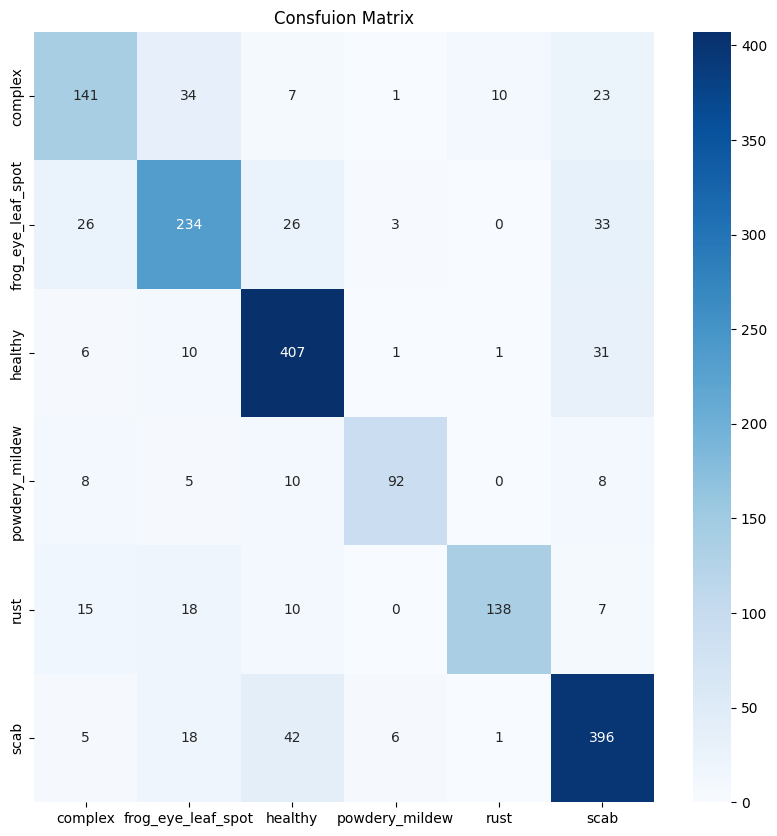

In [ ]:
#best model
best_model_one = KNeighborsClassifier(n_neighbors=13, n_jobs = -1)
best_model_one.fit(x_train, y_train)
best_ypred = best_model_one.predict(x_valid)
model_evaluations(y_valid, best_ypred)

In [ ]:
#Save KNN
import pickle
fh = open("/content/drive/MyDrive/1:1_Hanish_Acharla/Models/KNN_Best_Model", "wb")
pickle.dump(best_model_one, fh)
fh.close()

Random Forest

In [ ]:
#RF Hyper Parameter tuning
from sklearn.ensemble import RandomForestClassifier
max_depth = [1,2,3,4,5,6,7]
n_trees = [i for i in range(10,110,10)]
all_acc = []
for depth in max_depth:
  acc = []
  for tree in n_trees:
    model1 = RandomForestClassifier(n_estimators=tree, max_depth=depth, n_jobs = -1)
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    acc.append(accuracy)
    print("Depth: {} and Tree: {} done".format(depth, tree))
  all_acc.append(acc)

Depth: 1 and Tree: 10 done
Depth: 1 and Tree: 20 done
Depth: 1 and Tree: 30 done
Depth: 1 and Tree: 40 done
Depth: 1 and Tree: 50 done
Depth: 1 and Tree: 60 done
Depth: 1 and Tree: 70 done
Depth: 1 and Tree: 80 done
Depth: 1 and Tree: 90 done
Depth: 1 and Tree: 100 done
Depth: 2 and Tree: 10 done
Depth: 2 and Tree: 20 done
Depth: 2 and Tree: 30 done
Depth: 2 and Tree: 40 done
Depth: 2 and Tree: 50 done
Depth: 2 and Tree: 60 done
Depth: 2 and Tree: 70 done
Depth: 2 and Tree: 80 done
Depth: 2 and Tree: 90 done
Depth: 2 and Tree: 100 done
Depth: 3 and Tree: 10 done
Depth: 3 and Tree: 20 done
Depth: 3 and Tree: 30 done
Depth: 3 and Tree: 40 done
Depth: 3 and Tree: 50 done
Depth: 3 and Tree: 60 done
Depth: 3 and Tree: 70 done
Depth: 3 and Tree: 80 done
Depth: 3 and Tree: 90 done
Depth: 3 and Tree: 100 done
Depth: 4 and Tree: 10 done
Depth: 4 and Tree: 20 done
Depth: 4 and Tree: 30 done
Depth: 4 and Tree: 40 done
Depth: 4 and Tree: 50 done
Depth: 4 and Tree: 60 done
Depth: 4 and Tree: 70 don

In [ ]:
print(all_acc)

[[0.39537507050197407, 0.3835307388606881, 0.39142695995487875, 0.4015792442188381, 0.40609137055837563, 0.4241398759165257, 0.41398759165256627, 0.4258319232938522, 0.4077834179357022, 0.4218838127467569], [0.4715172024816695, 0.48279751833051326, 0.4912577552171461, 0.5104342921601804, 0.4935138183869148, 0.5053581500282008, 0.5064861816130851, 0.5014100394811055, 0.5070501974055274, 0.5087422447828539], [0.5583756345177665, 0.5696559503666103, 0.5617597292724196, 0.5803722504230119, 0.580936266215454, 0.5893965031020869, 0.601804850535815, 0.5786802030456852, 0.5668358714043993, 0.5803722504230119], [0.6029328821206994, 0.6339537507050197, 0.6531302876480541, 0.6429780033840947, 0.6305696559503666, 0.6424139875916526, 0.6412859560067682, 0.64692611393119, 0.6474901297236323, 0.6452340665538635], [0.6700507614213198, 0.664410603496898, 0.6604624929498026, 0.679639029892837, 0.6813310772701635, 0.6723068245910886, 0.6807670614777214, 0.6830231246474902, 0.6875352509870276, 0.698251551

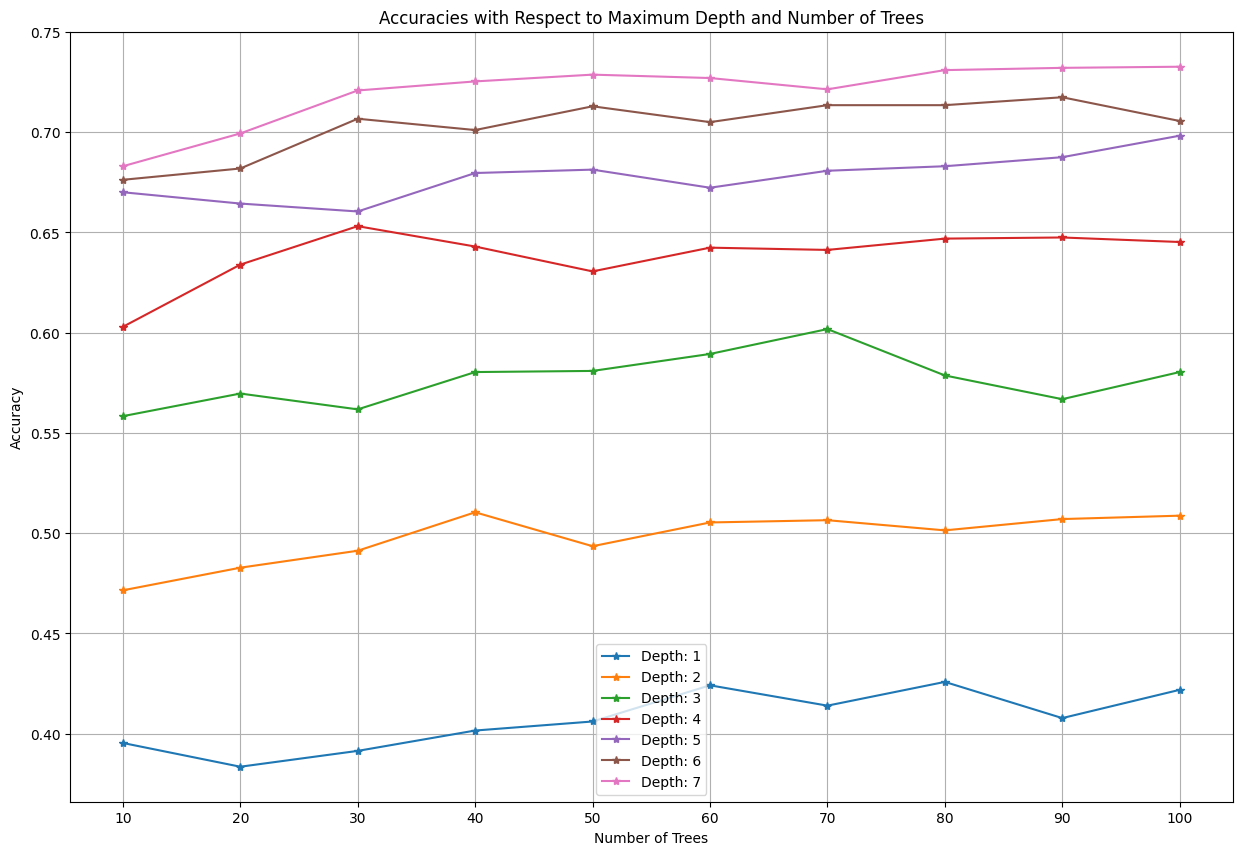

In [ ]:
#RF Train accuracy plot
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
# line 1 points
# plotting the line 1 points
for i in range(len(max_depth)):
  plt.plot(n_trees, all_acc[i],"*-",label = "Depth: {}".format(max_depth[i]))
plt.xlabel('Number of Trees')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Accuracies with Respect to Maximum Depth and Number of Trees')
# show a legend on the plot
# This shows which line belongs to which plot
# Note that the legend displays whatever we entered as label,
# when specifying plt.plot arguments above
# Display a figure.
plt.xticks([i for i in range(10,110,10)])
plt.grid(True)

plt.legend()

plt.show()

Accuracy score: 0.7326565143824028

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.55      0.65       216
           1       0.66      0.61      0.63       322
           2       0.75      0.88      0.81       456
           3       0.93      0.64      0.76       123
           4       0.93      0.61      0.74       188
           5       0.66      0.84      0.74       468

    accuracy                           0.73      1773
   macro avg       0.79      0.69      0.72      1773
weighted avg       0.75      0.73      0.73      1773



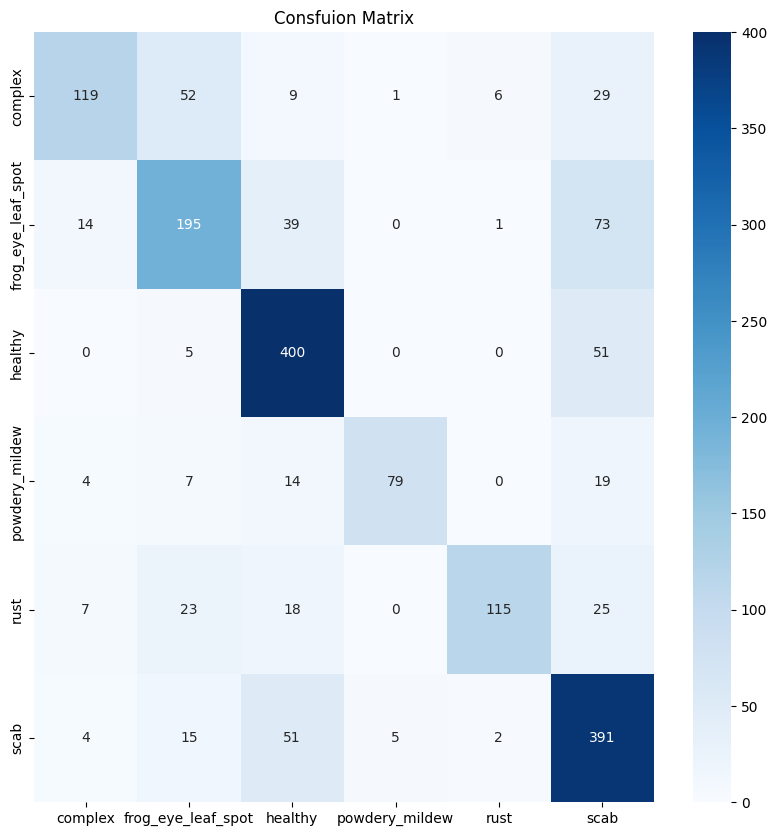

In [ ]:
#best model
best_model_two = RandomForestClassifier(max_depth=7, n_estimators=100)
best_model_two.fit(x_train, y_train)
best_ypred = best_model_two.predict(x_valid)
model_evaluations(y_valid, best_ypred)

In [ ]:
#Save best RF Model
import pickle
fh = open("/content/drive/MyDrive/1:1_Hanish_Acharla/Models/RF_Best_Model", "wb")
pickle.dump(best_model_two, fh)
fh.close()

MLP

In [ ]:
#MLP Hyper parameter Tuning
from sklearn.neural_network import MLPClassifier
learning_rate = [0.01, 0.05, 0.001, 0.0001, 0.00001]
epochs = [i for i in range(100,200,10)]
all_acc_mlp = []
for lr in learning_rate:
  acc_mlp = []
  for epo in epochs:
    model1 = MLPClassifier(learning_rate_init=lr, max_iter=epo)
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    acc_mlp.append(accuracy)
    print("Depth: {} and Learning Rate: {} done".format(lr, epo))
  all_acc_mlp.append(acc_mlp)

Depth: 0.01 and Learning Rate: 100 done
Depth: 0.01 and Learning Rate: 110 done
Depth: 0.01 and Learning Rate: 120 done
Depth: 0.01 and Learning Rate: 130 done
Depth: 0.01 and Learning Rate: 140 done
Depth: 0.01 and Learning Rate: 150 done
Depth: 0.01 and Learning Rate: 160 done
Depth: 0.01 and Learning Rate: 170 done
Depth: 0.01 and Learning Rate: 180 done
Depth: 0.01 and Learning Rate: 190 done
Depth: 0.05 and Learning Rate: 100 done
Depth: 0.05 and Learning Rate: 110 done
Depth: 0.05 and Learning Rate: 120 done
Depth: 0.05 and Learning Rate: 130 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.05 and Learning Rate: 140 done
Depth: 0.05 and Learning Rate: 150 done
Depth: 0.05 and Learning Rate: 160 done
Depth: 0.05 and Learning Rate: 170 done
Depth: 0.05 and Learning Rate: 180 done
Depth: 0.05 and Learning Rate: 190 done
Depth: 0.001 and Learning Rate: 100 done
Depth: 0.001 and Learning Rate: 110 done
Depth: 0.001 and Learning Rate: 120 done
Depth: 0.001 and Learning Rate: 130 done
Depth: 0.001 and Learning Rate: 140 done
Depth: 0.001 and Learning Rate: 150 done
Depth: 0.001 and Learning Rate: 160 done
Depth: 0.001 and Learning Rate: 170 done
Depth: 0.001 and Learning Rate: 180 done
Depth: 0.001 and Learning Rate: 190 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 100 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 110 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 120 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 130 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 140 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 150 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 160 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 170 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 180 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 0.0001 and Learning Rate: 190 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 100 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 110 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 120 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 130 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 140 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 150 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 160 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 170 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(


Depth: 1e-05 and Learning Rate: 180 done
Depth: 1e-05 and Learning Rate: 190 done


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  warnings.warn(


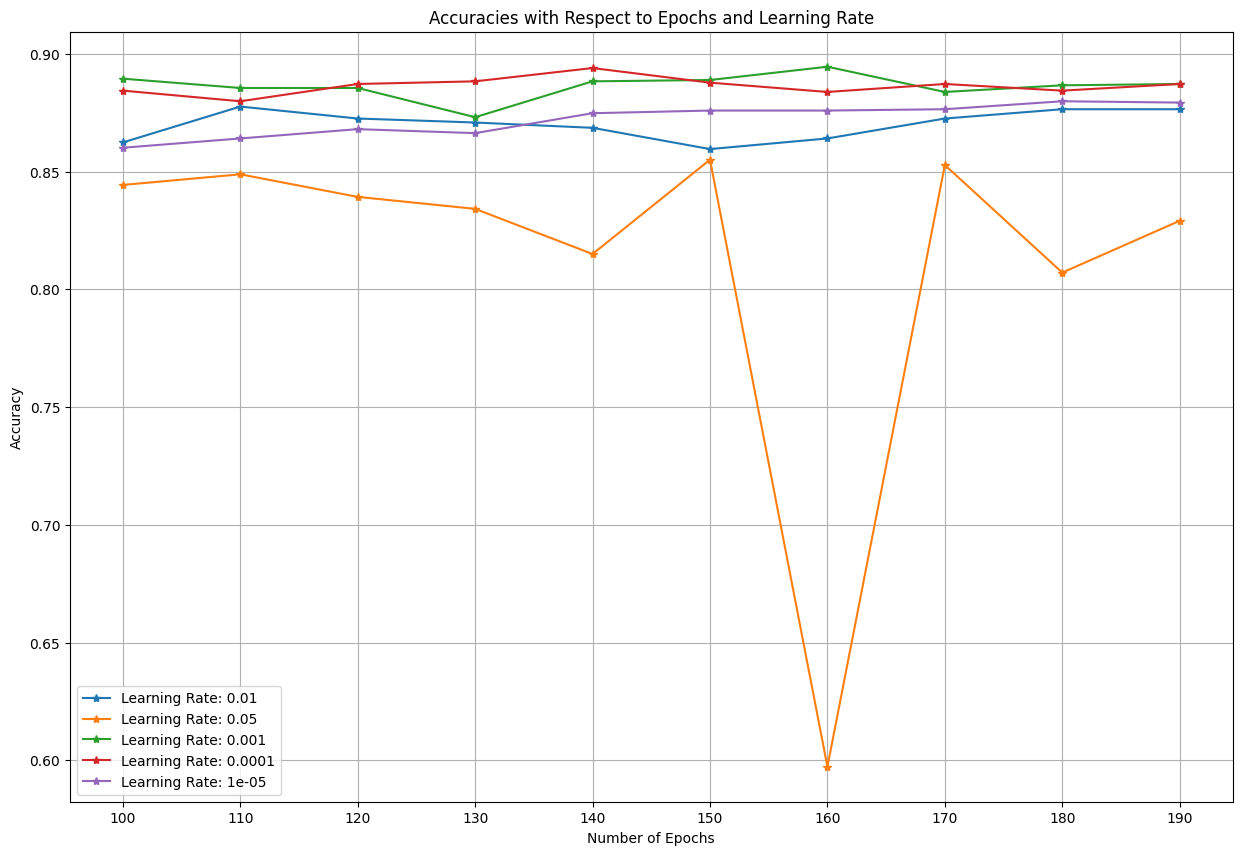

In [ ]:
#MPL Train accuracy graph
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
# line 1 points
# plotting the line 1 points
for i in range(len(learning_rate)):
  plt.plot(epochs, all_acc_mlp[i],"*-",label = "Learning Rate: {}".format(learning_rate[i]))
plt.xlabel('Number of Epochs')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Accuracies with Respect to Epochs and Learning Rate')
# show a legend on the plot
# This shows which line belongs to which plot
# Note that the legend displays whatever we entered as label,
# when specifying plt.plot arguments above
# Display a figure.
plt.xticks([i for i in range(100,200,10)])
plt.grid(True)

plt.legend()

plt.show()

Accuracy score: 0.8939650310208686

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.81      0.81       216
           1       0.85      0.90      0.87       322
           2       0.93      0.94      0.94       456
           3       0.96      0.87      0.91       123
           4       0.92      0.86      0.89       188
           5       0.90      0.90      0.90       468

    accuracy                           0.89      1773
   macro avg       0.90      0.88      0.89      1773
weighted avg       0.89      0.89      0.89      1773



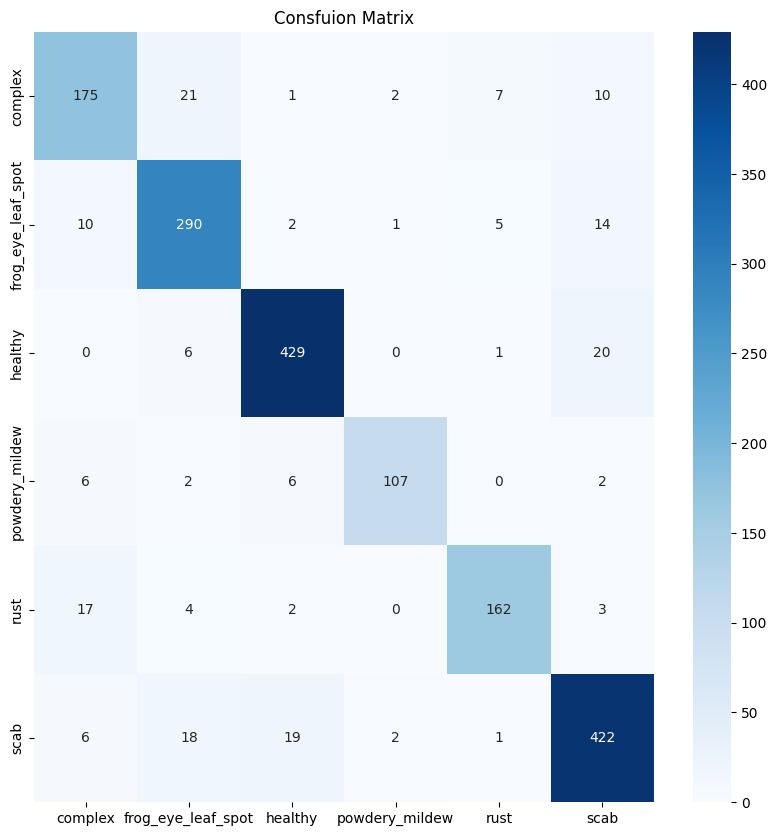

In [ ]:
#best model
best_model_three = MLPClassifier(learning_rate_init=0.001, max_iter=160)
best_model_three.fit(x_train, y_train)
best_ypred = best_model_three.predict(x_valid)
model_evaluations(y_valid, best_ypred)

In [ ]:
print(all_acc_mlp)

[[0.862380146644106, 0.8776085730400451, 0.8725324309080654, 0.8708403835307389, 0.8685843203609701, 0.8595600676818951, 0.8640721940214326, 0.8725324309080654, 0.8764805414551607, 0.8764805414551607], [0.8443316412859561, 0.8488437676254935, 0.8392554991539763, 0.8341793570219966, 0.8150028200789622, 0.8550479413423576, 0.5972927241962775, 0.8527918781725888, 0.8071065989847716, 0.8291032148900169], [0.8894529046813311, 0.8855047941342358, 0.8855047941342358, 0.8730964467005076, 0.8883248730964467, 0.8888888888888888, 0.8945290468133108, 0.8838127467569092, 0.8866328257191202, 0.8871968415115623], [0.8843767625493514, 0.8798646362098139, 0.8871968415115623, 0.8883248730964467, 0.8939650310208686, 0.8877608573040046, 0.8838127467569092, 0.8871968415115623, 0.8843767625493514, 0.8871968415115623], [0.8601240834743373, 0.8640721940214326, 0.868020304568528, 0.8663282571912013, 0.8747884940778342, 0.8759165256627186, 0.8759165256627186, 0.8764805414551607, 0.8798646362098139, 0.8793006204

In [ ]:
#Save MLP
import pickle
fh = open("/content/drive/MyDrive/1:1_Hanish_Acharla/Models/MLP_Best_Model", "wb")
pickle.dump(best_model_three, fh)
fh.close()